In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/salary_prediction_data.csv')

In [ ]:
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [ ]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [ ]:
df.tail()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720
999,High School,25,Urban,Director,41,Female,71077.000066


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.size

7000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [ ]:
df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df[df.duplicated()]

,Education,Experience,Location,Job_Title,Age,Gender,Salary


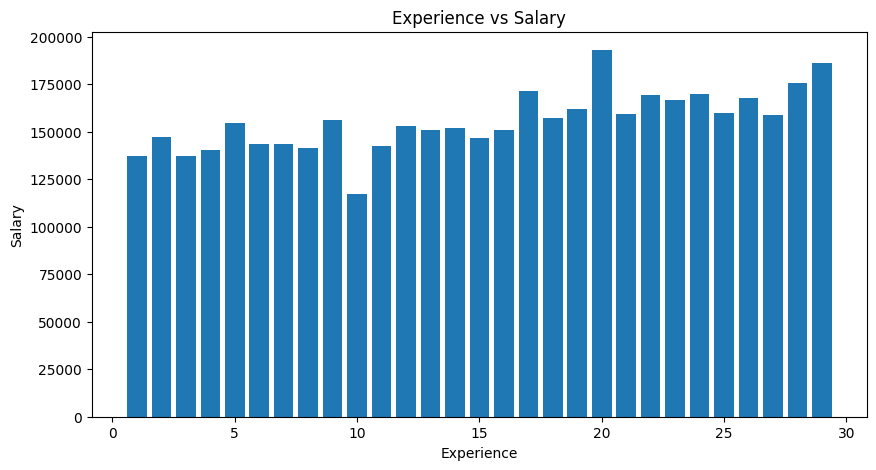

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=df['Experience'],height=df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

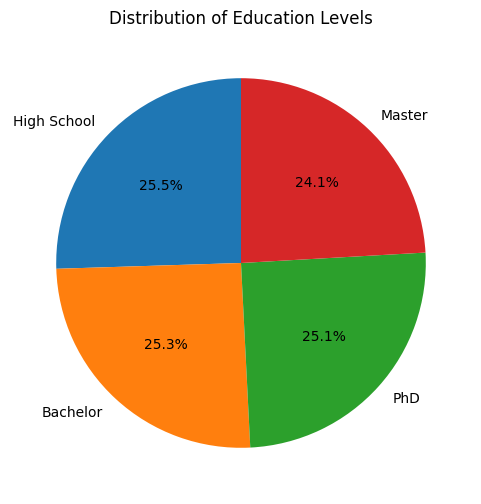

In [ ]:
education_counts = df['Education'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education Levels')
plt.show()

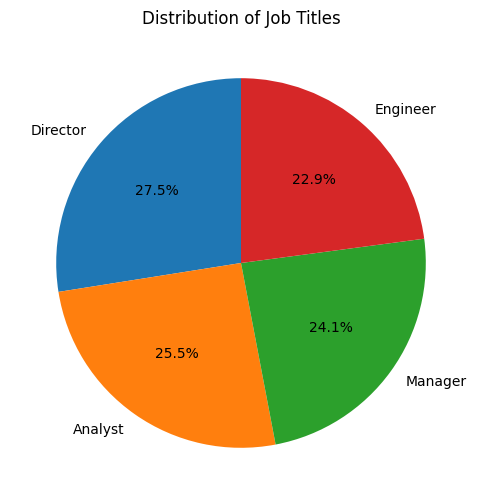

In [ ]:
job_title_counts = df['Job_Title'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Titles')
plt.show()

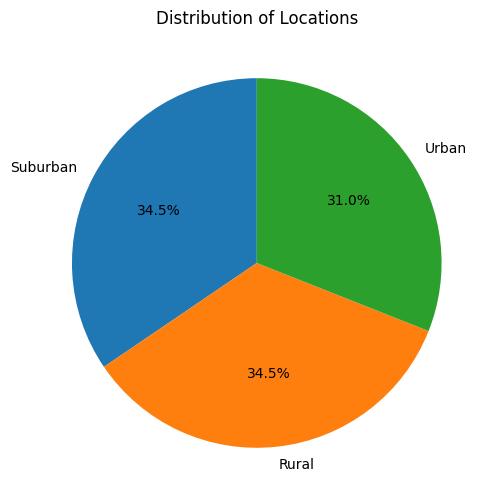

In [ ]:
location_counts = df['Location'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Locations')
plt.show()

In [ ]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [ ]:
catogorical_columns=[col for col in df.columns if df[col].dtype=='object']
numerical_columns=[col for col in df.columns if df[col].dtype!='object']

In [ ]:
catogorical_columns

['Education', 'Location', 'Job_Title', 'Gender']

In [ ]:
numerical_columns

['Experience', 'Age', 'Salary']

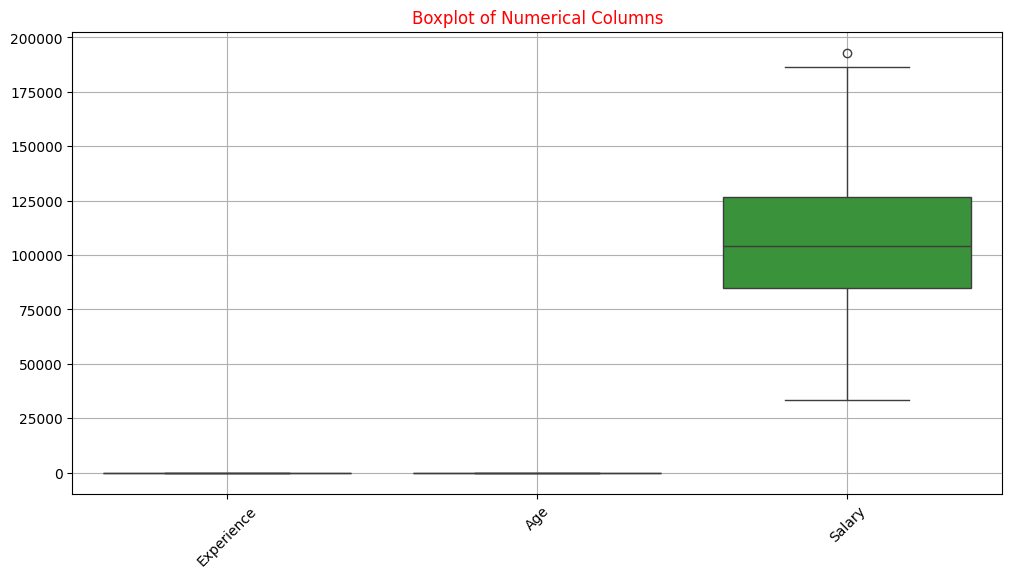

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns',color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.show()

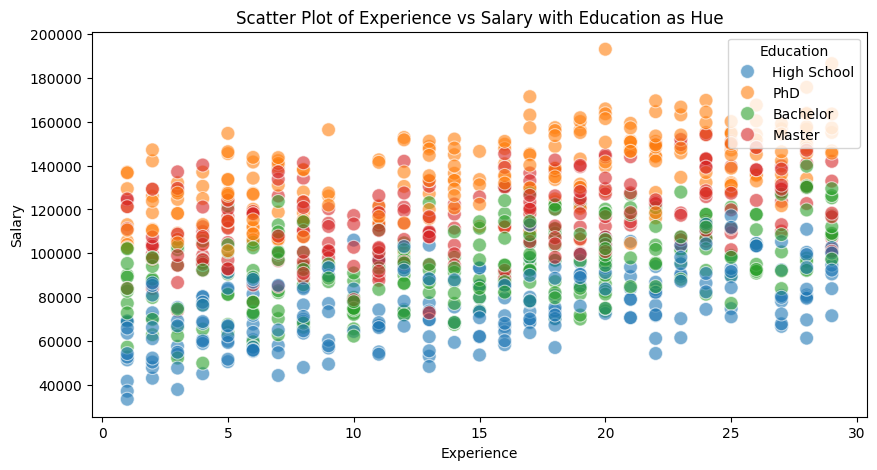

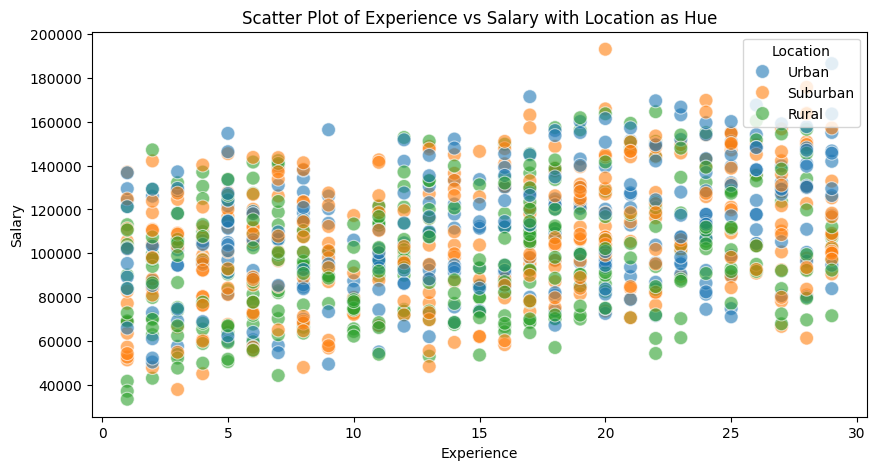

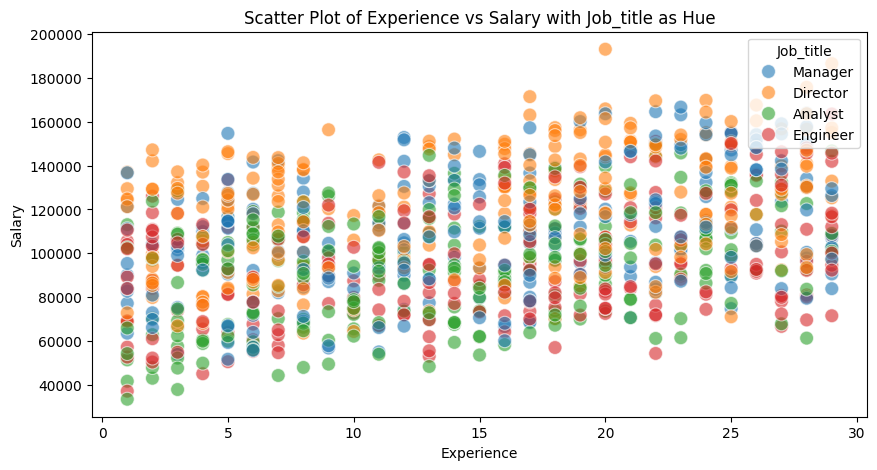

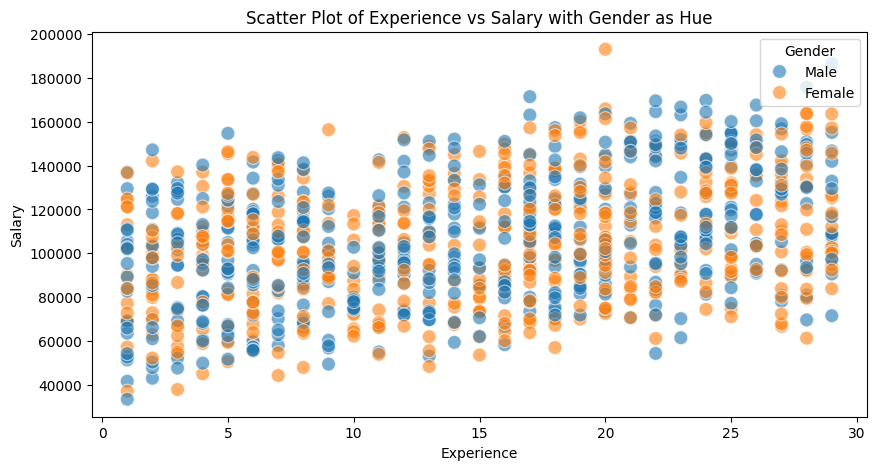

In [ ]:
for catogerical_column in catogorical_columns:
  plt.figure(figsize=(10,5))
  # Use catogerical_column instead of col in the hue argument
  sns.scatterplot(data=df,x='Experience',y='Salary',hue=catogerical_column,alpha=0.6, s=100)
  # Use catogerical_column instead of col in the title and legend
  plt.title(f'Scatter Plot of Experience vs Salary with {catogerical_column.capitalize()} as Hue')
  plt.xlabel('Experience')  # Changed from 'Area' to 'Experience'
  plt.ylabel('Salary')  # Changed from 'Price' to 'Salary'
  plt.legend(title=catogerical_column.capitalize(), loc='upper right')
  plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ord_enco=make_pipeline(OrdinalEncoder())
transformer=ColumnTransformer(transformers=[('encoder',ord_enco,catogorical_columns)])
transformer

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Education', 'Location', 'Job_Title',
                                  'Gender'])])

In [ ]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Education', 'Location', 'Job_Title',
                                  'Gender'])])>

In [ ]:
df1 = pd.DataFrame(transformer.fit_transform(df[catogorical_columns]))
df1

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,3.0,1.0,1.0,1.0
2,0.0,1.0,3.0,0.0
3,1.0,0.0,1.0,1.0
4,3.0,2.0,0.0,0.0
...,...,...,...,...
995,1.0,1.0,0.0,0.0
996,1.0,2.0,2.0,0.0
997,2.0,0.0,0.0,1.0
998,0.0,1.0,1.0,0.0


In [ ]:
simple_imputer=SimpleImputer(strategy='mean')
df2=pd.DataFrame(simple_imputer.fit_transform(df[numerical_columns]))
df2


,0,1,2
0,8.0,63.0,84620.053665
1,11.0,59.0,142591.255894
2,28.0,61.0,97800.255404
3,29.0,45.0,96834.671282
4,25.0,26.0,132157.786175
...,...,...,...
995,8.0,25.0,64683.389864
996,24.0,30.0,74468.205020
997,18.0,44.0,98207.026024
998,27.0,31.0,108544.922720


In [ ]:
features=pd.concat([df1,df2],axis=1)
features

,0,1,2,3,0,1,2
0,1.0,2.0,3.0,1.0,8.0,63.0,84620.053665
1,3.0,1.0,1.0,1.0,11.0,59.0,142591.255894
2,0.0,1.0,3.0,0.0,28.0,61.0,97800.255404
3,1.0,0.0,1.0,1.0,29.0,45.0,96834.671282
4,3.0,2.0,0.0,0.0,25.0,26.0,132157.786175
...,...,...,...,...,...,...,...
995,1.0,1.0,0.0,0.0,8.0,25.0,64683.389864
996,1.0,2.0,2.0,0.0,24.0,30.0,74468.205020
997,2.0,0.0,0.0,1.0,18.0,44.0,98207.026024
998,0.0,1.0,1.0,0.0,27.0,31.0,108544.922720


In [ ]:
old_name= range(0,4)
new_name= catogorical_columns
old_name1= range(4,8)
new_name1=numerical_columns
features=features.rename(columns=dict(zip(old_name,new_name)))
features=features.rename(columns=dict(zip(old_name1,new_name1)))
features

,Education,Location,Job_Title,Gender,Education,Location,Job_Title
0,1.0,2.0,3.0,1.0,8.0,63.0,84620.053665
1,3.0,1.0,1.0,1.0,11.0,59.0,142591.255894
2,0.0,1.0,3.0,0.0,28.0,61.0,97800.255404
3,1.0,0.0,1.0,1.0,29.0,45.0,96834.671282
4,3.0,2.0,0.0,0.0,25.0,26.0,132157.786175
...,...,...,...,...,...,...,...
995,1.0,1.0,0.0,0.0,8.0,25.0,64683.389864
996,1.0,2.0,2.0,0.0,24.0,30.0,74468.205020
997,2.0,0.0,0.0,1.0,18.0,44.0,98207.026024
998,0.0,1.0,1.0,0.0,27.0,31.0,108544.922720


In [ ]:
features.columns.values[1]='Location'
features.columns.values[2]='Job_Title'
features.columns.values[3]='Gender'
features.columns.values[4]='Experience'
features.columns.values[5]='Age'
features.columns.values[6]='Salary'
features

,Education,Location,Job_Title,Gender,Experience,Age,Salary
0,1.0,2.0,3.0,1.0,8.0,63.0,84620.053665
1,3.0,1.0,1.0,1.0,11.0,59.0,142591.255894
2,0.0,1.0,3.0,0.0,28.0,61.0,97800.255404
3,1.0,0.0,1.0,1.0,29.0,45.0,96834.671282
4,3.0,2.0,0.0,0.0,25.0,26.0,132157.786175
...,...,...,...,...,...,...,...
995,1.0,1.0,0.0,0.0,8.0,25.0,64683.389864
996,1.0,2.0,2.0,0.0,24.0,30.0,74468.205020
997,2.0,0.0,0.0,1.0,18.0,44.0,98207.026024
998,0.0,1.0,1.0,0.0,27.0,31.0,108544.922720


In [ ]:
features

,Education,Location,Job_Title,Gender,Experience,Age,Salary
0,1.0,2.0,3.0,1.0,8.0,63.0,84620.053665
1,3.0,1.0,1.0,1.0,11.0,59.0,142591.255894
2,0.0,1.0,3.0,0.0,28.0,61.0,97800.255404
3,1.0,0.0,1.0,1.0,29.0,45.0,96834.671282
4,3.0,2.0,0.0,0.0,25.0,26.0,132157.786175
...,...,...,...,...,...,...,...
995,1.0,1.0,0.0,0.0,8.0,25.0,64683.389864
996,1.0,2.0,2.0,0.0,24.0,30.0,74468.205020
997,2.0,0.0,0.0,1.0,18.0,44.0,98207.026024
998,0.0,1.0,1.0,0.0,27.0,31.0,108544.922720


In [ ]:
correlation=features.corr()
correlation

,Education,Location,Job_Title,Gender,Experience,Age,Salary
Education,1.000000,0.018912,-0.047592,0.014559,0.013070,-0.035050,0.649063
Location,0.018912,1.000000,0.015504,0.044695,0.096275,-0.006347,0.177018
Job_Title,-0.047592,0.015504,1.000000,-0.041861,0.059504,-0.002767,0.083639
Gender,0.014559,0.044695,-0.041861,1.000000,-0.020602,0.049055,0.028173
Experience,0.013070,0.096275,0.059504,-0.020602,1.000000,0.044296,0.341918
Age,-0.035050,-0.006347,-0.002767,0.049055,0.044296,1.000000,-0.053174
Salary,0.649063,0.177018,0.083639,0.028173,0.341918,-0.053174,1.000000


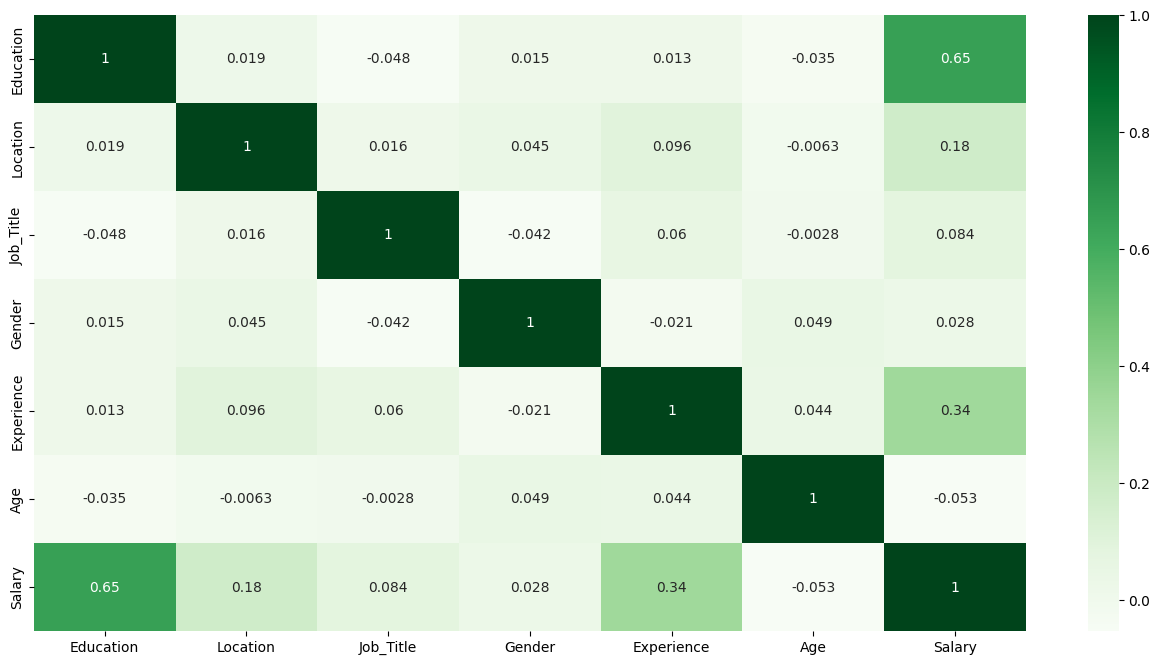

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(correlation,annot=True,cmap="Greens")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X=features.drop('Salary',axis=1)
Y=features['Salary']

In [ ]:
X

,Education,Location,Job_Title,Gender,Experience,Age
0,1.0,2.0,3.0,1.0,8.0,63.0
1,3.0,1.0,1.0,1.0,11.0,59.0
2,0.0,1.0,3.0,0.0,28.0,61.0
3,1.0,0.0,1.0,1.0,29.0,45.0
4,3.0,2.0,0.0,0.0,25.0,26.0
...,...,...,...,...,...,...
995,1.0,1.0,0.0,0.0,8.0,25.0
996,1.0,2.0,2.0,0.0,24.0,30.0
997,2.0,0.0,0.0,1.0,18.0,44.0
998,0.0,1.0,1.0,0.0,27.0,31.0


In [ ]:
Y

,Salary
0,84620.053665
1,142591.255894
2,97800.255404
3,96834.671282
4,132157.786175
...,...
995,64683.389864
996,74468.205020
997,98207.026024
998,108544.922720


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=55)

In [ ]:
multi_model=LinearRegression()
multi_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions=multi_model.predict(x_test)
predictions

array([114361.19812781, 106249.65884508,  93206.92800342, 100398.21891103,
        97704.1951015 , 124556.96874152,  81542.90250929, 120699.27693622,
        89529.36318848, 103053.71014316, 115786.54454666, 121109.29688597,
       111406.32629812,  64903.51077633,  88659.62115733,  99278.73801511,
       111318.42687626,  78052.59597115,  80639.08783357,  77248.48931871,
       138159.89434451,  98538.78290485, 112462.33590799, 120086.44709454,
        95107.91959155, 128570.36054938,  80224.39056885, 112816.81373924,
       130417.73874034, 123294.41777799,  95793.48026469, 118238.25686126,
       101060.38087283,  79764.70234383, 102993.15455455,  68945.41048212,
        92553.23521719, 123468.73278519, 106588.15604361,  84000.02147791,
        85330.23277403, 116778.89088279, 109384.70651201, 149762.97106612,
        93602.8570022 , 114873.68770768,  80738.44668851, 115420.92618622,
        93127.2456893 ,  88081.14703041, 128913.22545021,  77138.99764789,
        64829.68929225, 1

In [ ]:
r2_score(y_test,predictions)

0.6001301205044015

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predictions)
mae

14270.480883242404

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model=RandomForestRegressor(n_estimators=100,bootstrap=True,max_features='log2')
random_model.fit(x_train,y_train)

RandomForestRegressor(max_features='log2')

In [ ]:
predictions1=random_model.predict(x_test)
predictions1

array([109338.16431089,  85526.77609925,  87803.23836274, 110188.10804809,
        77159.38744732, 117776.37304724,  89834.57506677, 127077.62862533,
        74618.87539118,  97678.579076  , 114174.62520934, 114394.28007831,
       102357.40191936,  68569.79769011,  82052.02378692,  92887.56510556,
        89648.34865274,  89980.10287806,  86870.74890603,  91968.55216327,
       127922.98634301,  87494.78886211, 126933.21532328, 126202.12688266,
        74729.83807974, 124297.41244965,  92059.36829559, 117229.72930599,
       125716.50078317, 124031.12861747,  68403.68591616, 115895.07144346,
       102965.71874096,  86149.01123281, 125266.12181335, 106486.44575612,
       103925.48229556, 135193.51187292,  80701.83204645,  88678.90048625,
        93025.08513203, 109500.06835934, 127461.51007706, 151563.92221557,
        99411.50123607, 126910.05168447,  96785.40446509, 117249.83171019,
        73551.69501877,  68075.79660799, 118605.84449484,  91255.02129318,
        80122.42518795, 1

In [ ]:
r2_score(y_test,predictions1)

0.8383533509724893

In [ ]:
!pip install lightgbm==3.3.5
import lightgbm as lgb


In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=100,max_depth=3,max_bins=10,boosting_type='goss',top_rate=0.3,other_rate=0.2)
lgb_model.fit(x_train, y_train)

LGBMRegressor(boosting_type='goss', max_bins=10, max_depth=3, other_rate=0.2,
              top_rate=0.3)

In [ ]:
predictions2=lgb_model.predict(x_test)
predictions2

array([102708.92857824,  87935.20617084,  83028.54473314, 115312.87101433,
        77852.79920474, 115682.70807232,  98491.15572751, 126586.98506771,
        66542.72926443,  93767.70309153, 109009.73496052, 109576.70422087,
       102083.95916516,  67662.14596593,  81941.1342672 ,  93708.61898594,
        91034.02541966,  90910.38530134,  89116.9725111 ,  84754.09285822,
       130622.54481552,  91942.56293441, 132199.5056574 , 129714.25102813,
        78449.89879539, 121139.31044155,  86320.24141108, 109746.52551368,
       125023.02866363, 117739.98782718,  70540.06819782, 115065.74028903,
       101895.77210565,  81840.96501093, 122211.43370808,  95856.04721908,
       102596.00190413, 134990.29986468,  76238.24260267,  88916.80672628,
        89205.70872484, 109323.37486282, 125142.87701634, 158678.77839354,
       102659.834461  , 131425.52002566, 103136.55197196, 107176.35795441,
        73863.14960231,  66999.39174721, 125828.60671735,  83395.67099409,
        73277.74045782, 1

In [ ]:
r2_score(y_test,predictions2)

0.8559605729460922

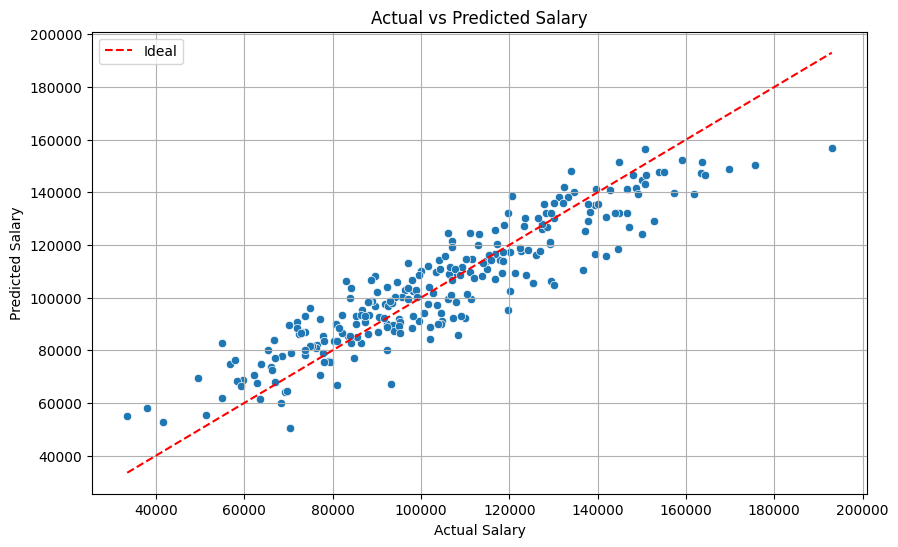

In [ ]:
df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': predictions1})
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Actual', y='Predicted', data=df_actual_vs_predicted)
plt.plot([df_actual_vs_predicted['Actual'].min(), df_actual_vs_predicted['Actual'].max()],
         [df_actual_vs_predicted['Actual'].min(), df_actual_vs_predicted['Actual'].max()],
         '--', color='red', label='Ideal')  # Add a diagonal line for reference
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit

In [ ]:
file='lgbm.pkl'


In [ ]:
import pickle


In [ ]:
pickle.dump(random_model,open(file,'wb'))


In [ ]:
!npm install -g localtunnel -U


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
changed 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [ ]:
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [ ]:
%%writefile Model_Dep_app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image

model=pickle.load(open('lgbm.pkl','rb'))
def predict(Education,Job_Title,Location,Gender,Experience,Age):
  input=np.array([[Education,Job_Title,Location,Gender,Experience,Age]]).astype(np.float64)
  prediction=model.predict(input)
  return prediction

def main():
  st.title('Salary Prediction')
  st.write('Enter the details to predict the salary')
  Education=st.selectbox('Education',('High School','Bachelor','Master','PhD'))
  Location=st.selectbox('Location',('New York','Los Angeles','Chicago','Houston','Philadelphia'))
  Job_Title=st.selectbox('Job_Title',('Data Scientist','Data Analyst','Machine Learning Engineer','Software Engineer','Business Analyst'))
  Gender=st.selectbox('Gender',('Male','Female'))

  Experience=st.slider('Experience',0,30,1)
  Age=st.slider('Age',18,60,1)

  if Education=='High School':
    Education=0
  elif Education=='Bachelor':
    Education=1
  elif Education=='Master':
    Education=2
  elif Education=='PhD':
    Education=3
  if Location=='New York':
    Location=0
  elif Location=='Los Angeles':
    Location=1
  elif Location=='Chicago':
    Location=2
  elif Location=='Houston':
    Location=3
  elif Location=='Philadelphia':
    Location=4
  if Job_Title=='Data Scientist':
    Job_Title=0
  elif Job_Title=='Data Analyst':
    Job_Title=1
  elif Job_Title=='Machine Learning Engineer':
    Job_Title=2
  elif Job_Title=='Software Engineer':
    Job_Title=3
  elif Job_Title=='Business Analyst':
    Job_Title=4
  if Gender=='Male':
    Gender=0
  elif Gender=='Female':
    Gender=1

  if st.button('Predict'):
    result=predict(Education,Job_Title,Location,Gender,Experience,Age)
    st.success(f'The predicted salary is {result[0]:.2f}')

if __name__=='__main__':
  main()





Overwriting Model_Dep_app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com


34.90.34.69


In [ ]:
!streamlit run Model_Dep_app.py & npx localtunnel --port 8501




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.34.69:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://tall-lemons-beam.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature nam